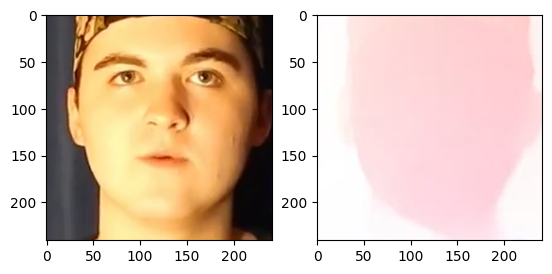

In [6]:
import cv2
import os 
import torch
import numpy as np
import torchvision.transforms.functional as F
from utils.extract_frames import *
import matplotlib.pyplot as plt

vid_path = "./dataset/train/training80_43/1AMp8Y_0UGc.002.mp4"
video_name = "1AMp8Y_0UGc.002.mp4"
resource_flow = "./dataset/train_flow"

# def resize_img(frame):
#     frame = torch.tensor(frame)
#     frame = frame.permute(2, 0, 1)
#     frame = F.resize(frame, [520, 960], antialias=False)
#     frame = frame.permute(1, 2, 0)
#     frame = frame.numpy()
#     frame.dtype = np.uint8

#     return frame
def process_video(vid_path, video_name, resource_flow):
    videoCapture = cv2.VideoCapture(vid_path)
    if video_name[0] == "*":
        video_name = '-' + video_name[1:]

    video_name = video_name.replace(".mp4", "")
    flows_path = os.path.join(resource_flow, video_name)
    i = 0
    while True:
        success, frame = videoCapture.read()
        if success:
            if i == 4:
                flow_path = os.path.join(flows_path, f"{(i-1):04d}.jpg")
                flow = cv2.imread(filename=flow_path)
                h, w = frame.shape[0], frame.shape[1]
                flow = resize_img(frame=flow, height=h, width=w)
                img, flow = get_image_face(frame, flow=flow)
                if img.all() != None:
                    # save_image("./demo", video_name, i, img, suffix=".jpg")
                    # save_image("./demo", video_name, i+1, flow, suffix=".jpg")
                    plt.subplot(1,2,1)
                    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                    plt.subplot(1,2,2)
                    plt.imshow(flow)
            i = i + 1
        else:
            break

process_video(vid_path=vid_path, video_name=video_name, resource_flow=resource_flow)
